The data set is the famous [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) 

##Problem: Trying to classify the species (i.e., class) of the flower based on four measurements that were provided: sepal length, sepal width, petal length, and petal width.

##Step 1: Checking the data

In [62]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, na_values=['NA'])
iris_data.columns = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm","class"]
iris_data.head()
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##Look at the distribution of data for outliers

In [63]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
# Load the required modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

##create scatter plot

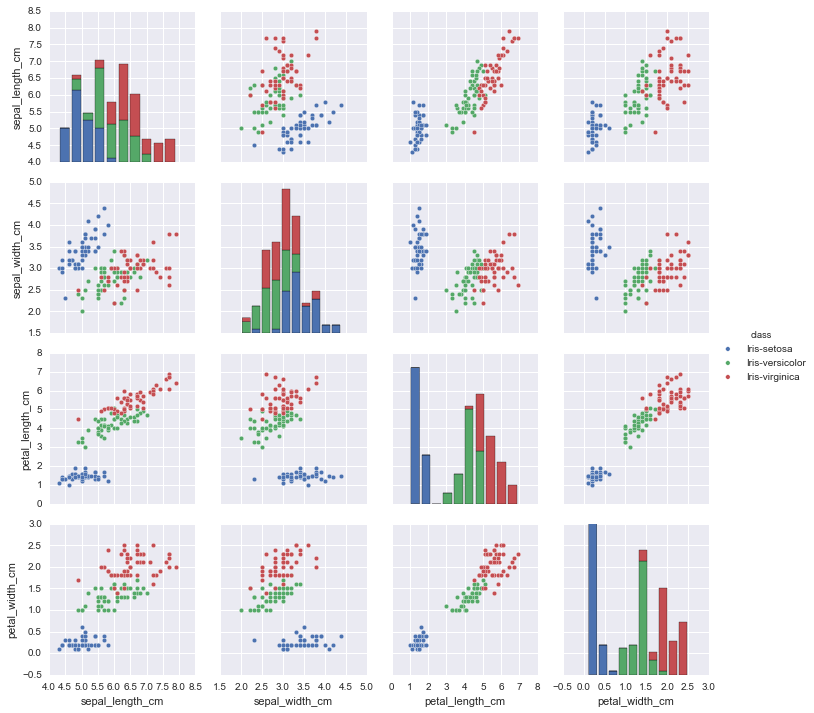

In [65]:
sb.pairplot(iris_data.dropna(), hue='class')

From the scatterplot matrix, we can see that setossa is cleared separed from the rest of the two classes. The other two classes are somewhat hard to separate

##Step 2: Classification (ML)

In [66]:
# Convert the pandas form to numpy format for Scikit learn to use it
# Data
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
# Target/Lables
all_classes = iris_data_clean['class'].values
all_inputs[:5]

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4]])

Now split the data.

In [68]:
from sklearn.cross_validation import train_test_split

training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

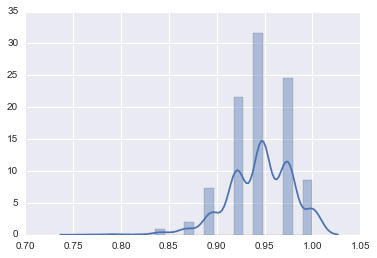

In [70]:
# Checking model accuracy:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

###k-fold Cross-validation (10-fold)

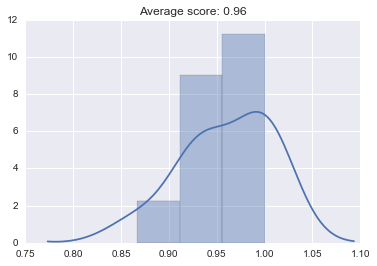

In [72]:
import numpy as np
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Now there is a much more consistent rating of classifier's general classification accuracy.

###Parameter tuning

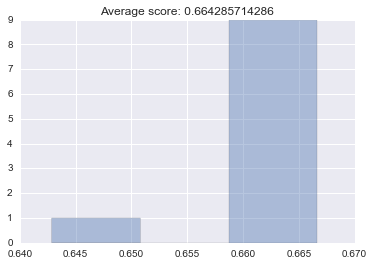

In [73]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

##Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(training_inputs, training_classes)
classifier_accuracy = random_forest_classifier.score(testing_inputs, testing_classes)
classifier_accuracy

0.97368421052631582